In [13]:
import numpy as np
import gymnasium as gym
from gymnasium import spaces
from matplotlib import pyplot as plt

In [20]:
class StockMarketEnv(gym.Env):
    def __init__(self): # , max_inventory=20 
        self.action_space = spaces.Discrete(3) # 0: 구매, 1: 판매, 2: 유지
        # self.max_inventory=max_inventory # 최대 보유개수
        # self.observation_space = []
        
    def reset(self):
        self.current_price=1000 # 현재가
        self.purchase=10000 # 소지금
        self.before_purchase=1000
        self.purchased_prices=[] # 구매한 코인들
        self.state=[self.current_price, self.purchase, self.purchased_prices] # [현재가, 소지금, 보유코인]
        self.step_count=0
        return self.state
    
    def step(self, action):
        self.current_price+=np.random.choice([-1,0,1])

        self.before_purchase=self.purchase

        if action == 0: # 구매
            if self.purchase-self.current_price>=0: # 소지금이 현재가보다 많으면
                self.purchase-=self.current_price # 소지금 -= 현재가 
                self.purchased_prices.append(self.current_price) # 보유코인에 현재가격 추가, 나중에 여기서 제일 비싼거로 팖
        elif action == 1: # 판매
            if len(self.purchased_prices)>0:
                self.purchase+=self.purchased_prices.pop(self.purchased_prices.index(max(self.purchased_prices))) # 보유코인중 가장 비싼 코인 팔기
        else:
            pass

        reward = self.purchase-self.before_purchase

        if self.step_count>=100: done=True
        else: done=False

        self.state = [self.current_price, self.purchase, self.purchased_prices]

        self.step_count+=1
        return self.state, reward, done, {}

In [18]:
def evaluate():
    global plt
    env = StockMarketEnv()
    state = env.reset()
    done = False 
    reward_history = []

    while not done:
        action = np.random.choice([0,1,2])
        state, reward, done, _ = env.step(action)
        reward_history.append(reward)
        print(state, reward, done, action)

    print(reward_history)

    plt.plot(range(101), reward_history)
    plt.show()

[999, 10000, []] 0 False 1
[999, 10000, []] 0 False 2
[999, 10000, []] 0 False 1
[998, 10000, []] 0 False 1
[998, 10000, []] 0 False 1
[999, 9001, [999]] -999 False 0
[1000, 10000, []] 999 False 1
[1001, 8999, [1001]] -1001 False 0
[1000, 7999, [1001, 1000]] -1000 False 0
[999, 7999, [1001, 1000]] 0 False 2
[1000, 6999, [1001, 1000, 1000]] -1000 False 0
[999, 6999, [1001, 1000, 1000]] 0 False 2
[998, 8000, [1000, 1000]] 1001 False 1
[999, 9000, [1000]] 1000 False 1
[999, 9000, [1000]] 0 False 2
[998, 10000, []] 1000 False 1
[998, 10000, []] 0 False 1
[999, 10000, []] 0 False 2
[998, 10000, []] 0 False 2
[997, 9003, [997]] -997 False 0
[996, 8007, [997, 996]] -996 False 0
[996, 7011, [997, 996, 996]] -996 False 0
[996, 7011, [997, 996, 996]] 0 False 2
[995, 6016, [997, 996, 996, 995]] -995 False 0
[996, 5020, [997, 996, 996, 995, 996]] -996 False 0
[995, 6017, [996, 996, 995, 996]] 997 False 1
[995, 5022, [996, 996, 995, 996, 995]] -995 False 0
[996, 5022, [996, 996, 995, 996, 995]] 0 F

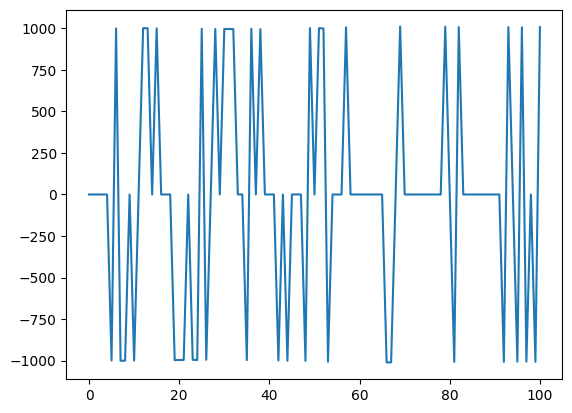

In [21]:
evaluate()

In [12]:
total_reward_history

NameError: name 'total_reward_history' is not defined

보상은 어떻게해야대는가
목표: 소지금을 최대한 늘린다
보상을 최대한 늘리는 방향으로 가야댄다
그리고 돈이 줄면 보상
보상 = 돈의 변화량